In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]
print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(1.0, 2.0, 101)
s_vals = s_vals[:-1]
# s_vals[0] = 1e-10
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5
 3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2
 4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9
 4.95 5.  ]


In [33]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 5.0

In [34]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
# alpha_vals[0] = 1e-10 # set alpha=0 to a small value
# initialize alpha_vals as 10 0.5s
# alpha_vals = np.ones(num_alphas)*0.5
print(alpha_vals)

d_vals = np.linspace(dlowlim, dhighlim, num_ds+1)
d_vals = d_vals[1:]
# d_vals[0] = 1e-10 # set d=0 to a small value
# initialize d_vals as 50 2.0s
# d_vals = np.ones(num_ds)*2.0
print(d_vals)

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [35]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


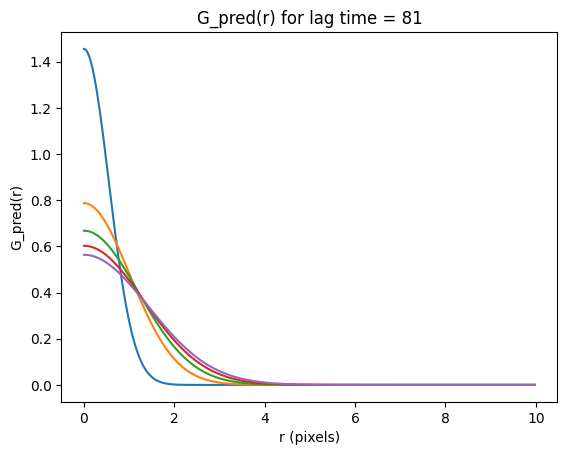

In [36]:
############### check this step ################
# G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

# G_pred[G_pred < 1e-5] = 0.0

# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(r_vals, G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()
# print(G_pred[1, :])

In [37]:
# laplace transform of G_pred(t, r) on time to get u_pred(s, r)
u_pred = np.zeros((s_vals.shape[0], r_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(r_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)

# normalize the u_pred
# print(np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)[0])
# u_pred = u_pred / np.trapz(u_pred, r_vals, axis=1).reshape(-1, 1)

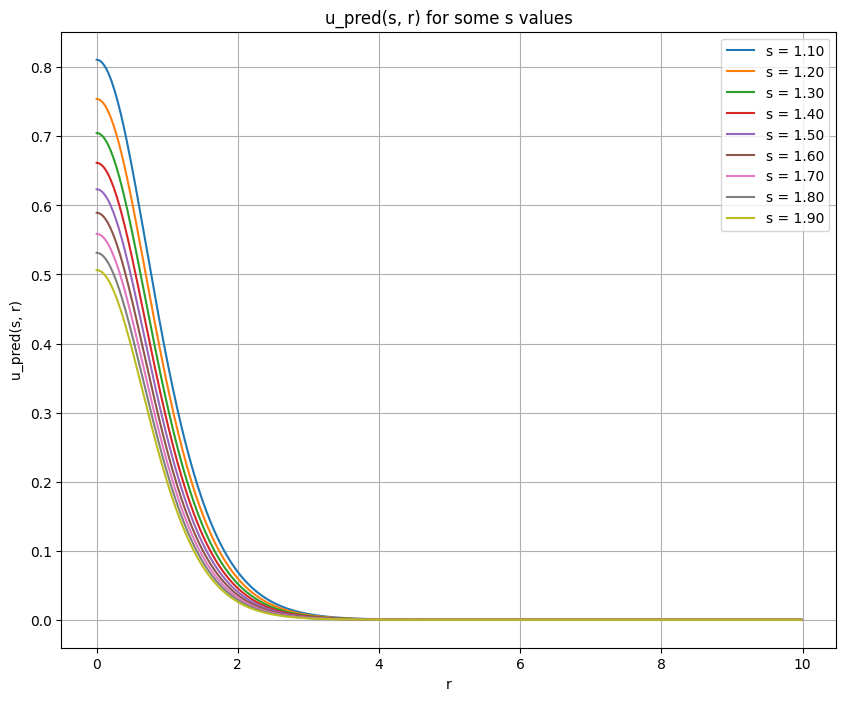

In [38]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, r) for some s values")
plt.xlabel("r")
plt.ylabel("u_pred(s, r)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(r_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [39]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(s, k, \alpha, D) = \frac{1}{2s}\sqrt{\frac{s^{\alpha}}{D}} e^{-r \sqrt{\frac{s^{\alpha}}{D}}}$

In [40]:
# calculate Z
# $Z(s, k, \alpha, D) = \frac{1}{2s}\sqrt{\frac{s^{\alpha}}{D}} e^{-r \sqrt{\frac{s^{\alpha}}{D}}}$
# Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
Z = np.zeros((s_vals.shape[0], r_vals.shape[0], alpha_vals.shape[0], d_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            val = np.sqrt(s_vals[k]**(alpha_vals[i])/d_vals[j])
            Z[k, :, i, j] = (1/(2*s_vals[k])) * val * np.exp(-r_vals*val)
            # Z[k, :, i, j] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]) + d_vals[j]*k_vals**2)
# normalize Z to have integral of Z over r equal to 1
# norm = np.trapz(Z, k_vals, axis=3).reshape(alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], 1)
norm = np.trapz(Z, r_vals, axis=1)
Z = Z / norm[:, None, :, :]
print(f"shape of Z : {Z.shape}")
print(f"max value of Z : {np.max(Z)}")
print(f"min value of Z : {np.min(Z)}")
print(f"mean value of Z : {np.mean(Z)}\n")

print(f"max value of u_pred : {np.max(u_pred)}")
print(f"min value of u_pred : {np.min(u_pred)}")
print(f"mean value of u_pred : {np.mean(u_pred)}")

shape of Z : (100, 500, 10, 50)
max value of Z : 4.307398734360698
min value of Z : 8.979963787899647e-19
mean value of Z : 0.10088410109353607

max value of u_pred : 0.8771318621166613
min value of u_pred : 5.462969408816854e-15
mean value of u_pred : 0.0653021744477218


In [41]:
# save the data to Z.npy
np.save("Z.npy", Z)